In [136]:
# Jordan Marshall - 18256716 | Marcin Sek - 18254187
# [Runs without error]
# [Link to original code if used]

(171, 9) (43, 9) (171,) (43,)


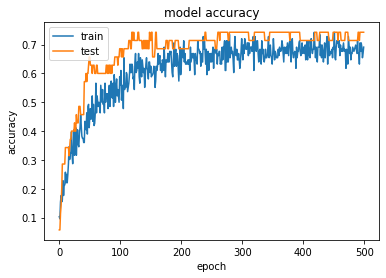

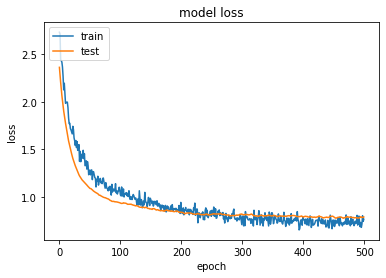

Test Accuracy: 0.605
Predicted: [[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.1846258e-05 4.8321707e-12 9.9998820e-01]] (class=7)


In [137]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

from numpy import argmax
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

# load the dataset
path = 'glass.csv'
df = read_csv(path, header=0)

# split into input and output columns
X, y = df.values[:, :-1], df.values[:, -1]

# ensure all data are floating point values
X = X.astype('float32')

# encode strings to integer
y = y.astype('int32')

# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# determine the number of input features
n_features = X_train.shape[1]

# define model
model = Sequential()
model.add(Dense(12, activation='elu', kernel_initializer='he_normal', input_shape=(n_features,)))
model.add(Dropout(0.2))
model.add(Dense(8, activation='elu', kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))

# compile the model
adam = Adam()
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# fit the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=500, batch_size=16, verbose=0)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

# make a prediction
row = [1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26]
yhat = model.predict([row])
print('Predicted: %s (class=%d)' % (yhat, argmax(yhat)))
